In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

%matplotlib widget

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==3: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)

SMALL_SIZE  = 10
MEDIUM_SIZE = 12

# title
plt.rc('axes',titlesize=MEDIUM_SIZE,titleweight='bold')
# xy-labels
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
    
px2inch = 1/plt.rcParams['figure.dpi']

In [2]:
def get_random(x_lims=[0,1],y_lims=[0,1],n=100,cmap='Reds'):
    
    # k      = 0.05
    # x_lims = np.array( x_lims )
    # y_lims = np.array( y_lims )
    # x_lims = x_lims + x_lims*np.array([1+k,1-k])
    # y_lims = y_lims + y_lims*np.array([1+k,1-k])

    x = x_lims[0] + (x_lims[1]-x_lims[0])*np.random.rand(1,n)
    y = y_lims[0] + (y_lims[1]-y_lims[0])*np.random.rand(1,n)
    c = np.sqrt(x**2+y**2)
    return {'mat':np.vstack((x,y)),'color':c,'cmap':cmap}

def sigmoid(z): 
    return 1/(1+np.exp(-z))

def tanh(z): 
    return 2*sigmoid(2*z)-1

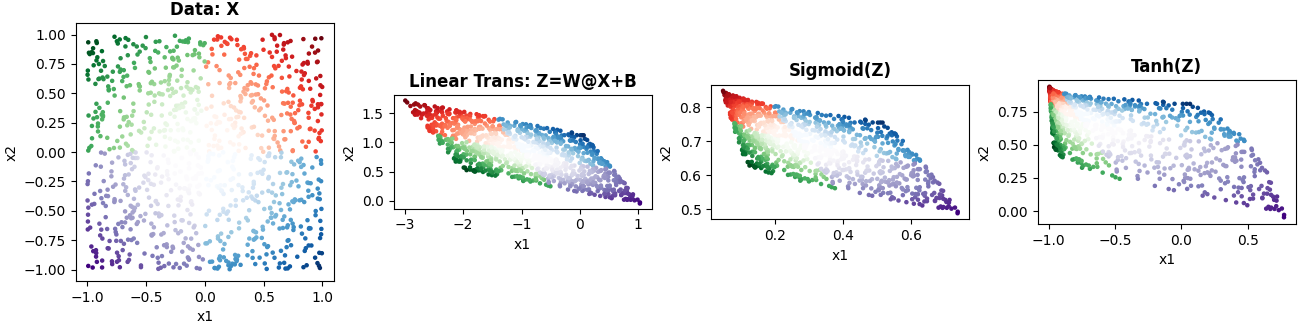

In [3]:
n = 250
a = get_random(x_lims=[0,1 ],y_lims=[0,1 ],n=n,cmap='Reds')
b = get_random(x_lims=[0,1 ],y_lims=[0,-1],n=n,cmap='Blues')
c = get_random(x_lims=[-1,0],y_lims=[0,1 ],n=n,cmap='Greens')
d = get_random(x_lims=[-1,0],y_lims=[-1,0],n=n,cmap='Purples')

size_plot = 325
fig, ax   = plt.subplots(1,4,constrained_layout=True,figsize=(4*size_plot*px2inch,size_plot*px2inch))

LT = np.array([[1,0],[0,1]])
LT = np.random.randn(2,2)
B  = np.random.randn(2,1)
for P in [a,b,c,d]:
    
    P0 = P['mat']
    P1 = LT@P0 + B
    P2 = sigmoid(P1)
    P3 = tanh(P1)
    
    cmin = 0.3
    s    = 5
    ax[0].scatter(P0[0,:],P0[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);
    ax[1].scatter(P1[0,:],P1[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);
    ax[2].scatter(P2[0,:],P2[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);
    ax[3].scatter(P3[0,:],P3[1,:],s=s,c=P['color'],cmap=P['cmap'],vmin=cmin);

    plot_sets(ax[0],xla='x1',yla='x2',gr=False,ar=1,ti='Data: X')
    plot_sets(ax[1],xla='x1',yla='x2',gr=False,ar=1,ti='Linear Trans: Z=W@X+B')
    plot_sets(ax[2],xla='x1',yla='x2',gr=False,ar=1,ti='Sigmoid(Z)')
    plot_sets(ax[3],xla='x1',yla='x2',gr=False,ar=1,ti='Tanh(Z)')